In [43]:
import pandas as pd
import matplotlib.pyplot as plt
# In AAPL.ipynb
from stock_data import StockData
# Make plots a bit nicer
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12, 6)
from dateutil import parser

from pandas.tseries.offsets import BDay

import seaborn as sns



## Load or download a data (GOOG)

In [44]:
# ============================================
# Download GOOG daily data for a year
# ============================================

ticker = "GOOG"
# ============================================
# Download AAPL daily data for a year
# ============================================



stock = StockData(ticker, start_date="2009-02-14", end_date="2020-06-03")

df = stock.load_data()
df.head()



C:\Users\Birhanu Matebe\Downloads\KAIM\Finanicial-Data-Analysis\Financial-Data-Analysis\src\stock_data.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.df = yf.download(


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2009-02-17,8.476503,8.586090,8.403033,8.571742,228067661
2009-02-18,8.735009,8.741689,8.423566,8.589802,241883252
2009-02-19,8.476008,8.900501,8.445582,8.842864,200295955
2009-02-20,8.570259,8.631360,8.287016,8.362465,249616129
2009-02-23,8.164813,8.653129,8.152196,8.583863,209626799


In [45]:
sentiment_df = pd.read_csv("../data/daily_sentiment.csv")

In [46]:
sentiment_df.sample(10)

,headline,url,publisher,date,stock,headline_length,TextBlob_Sentiment,TextBlob_Category
1011916,Newtek Business Services Reports FY17 Adj. NII...,https://www.benzinga.com/news/earnings/18/03/1...,Hal Lindon,2018-03-05 00:00:00+00:00,NEWT,90,0.000000,Neutral
232498,Piper Jaffray Lowers PT on Electronic Arts to $26,https://www.benzinga.com/analyst-ratings/price...,Juan Lopez,2012-01-27 00:00:00+00:00,EA,49,0.000000,Neutral
533783,Diamond Foods Appoints Dr. Celeste A. Clark to...,https://www.benzinga.com/news/14/07/4715662/di...,Eddie Staley,2014-07-21 00:00:00+00:00,K,65,0.000000,Neutral
33347,Top 5 Stocks In The Savings And Loans Industry...,https://www.benzinga.com/markets/company-news/...,Monica Gerson,2010-06-01 00:00:00+00:00,FNFG,128,0.500000,Positive
342959,"NYSE Euronext, IntercontinentalExchange Shares...",https://www.benzinga.com/news/12/12/3189876/ny...,Paul Quintaro,2012-12-20 00:00:00+00:00,ICE,92,0.000000,Neutral
1013885,Immutep Announces Clinical Trial Collaboration...,https://www.benzinga.com/news/18/03/11340312/i...,Charles Gross,2018-03-11 00:00:00+00:00,MRK,126,0.000000,Neutral
697568,Top 4 Mid-Cap Stocks In The Hospitals Industry...,https://www.benzinga.com/trading-ideas/15/09/5...,Monica Gerson,2015-09-25 00:00:00+00:00,LPNT,97,0.250000,Positive
972755,Weight Watchers Reaches Highest Level Since 2013,https://www.benzinga.com/trading-ideas/technic...,Joel Elconin,2017-11-07 00:00:00+00:00,WTW,48,0.000000,Neutral
1223529,Shares of several oil stocks are trading highe...,https://www.benzinga.com/markets/wiim/19/09/14...,luke@benzinga.com,2019-09-04 00:00:00+00:00,PBR,215,0.081250,Positive
77233,Black Friday ETFs To Consider,https://www.benzinga.com/trading-ideas/long-id...,Roger Nachman,2010-11-26 00:00:00+00:00,XRT,29,-0.166667,Negative


# 1. Data profiling

In [47]:
# ============================================
# Clean the columns (handle MultiIndex case)
# ============================================

# If columns are MultiIndex (like: ('Close', 'AMZN')), flatten them
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)  # keep only first level: Open, High, etc.

print("Cleaned columns:", df.columns.tolist())

# Optional: add a Ticker column (useful if using multiple tickers later)
df["Ticker"] = ticker

# Ensure index is datetime and sorted
df.index = pd.to_datetime(df.index)
df = df.sort_index()




Cleaned columns: ['Close', 'High', 'Low', 'Open', 'Volume']


# - Summary Statistics 

In [48]:


stock.inspect_data()




📌 Dataset Shape for GOOG: (2843, 6)

📌 First 5 rows:


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2009-02-17,8.476503,8.586090,8.403033,8.571742,228067661,GOOG
2009-02-18,8.735009,8.741689,8.423566,8.589802,241883252,GOOG
2009-02-19,8.476008,8.900501,8.445582,8.842864,200295955,GOOG
2009-02-20,8.570259,8.631360,8.287016,8.362465,249616129,GOOG
2009-02-23,8.164813,8.653129,8.152196,8.583863,209626799,GOOG



📌 Last 5 rows:


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2020-05-27,70.410156,70.603831,69.091680,70.380861,33716000,GOOG
2020-05-28,70.355049,71.552353,69.325595,69.368302,33844000,GOOG
2020-05-29,70.960396,71.141658,70.187191,70.365468,36418000,GOOG
2020-06-01,71.104408,71.409321,70.418103,70.437471,24342000,GOOG
2020-06-02,71.471901,71.491269,70.459329,71.041345,25562000,GOOG



📌 Random 5 rows:


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2016-10-25,40.109024,40.556463,39.983385,40.556463,31528000,GOOG
2011-09-06,12.917353,12.931701,12.628421,12.635842,109039179,GOOG
2009-10-22,13.706723,13.729234,13.556073,13.605548,93810311,GOOG
2011-06-09,12.782537,12.863428,12.755573,12.863428,67817246,GOOG
2012-05-31,14.368942,14.595042,14.322931,14.563378,119177037,GOOG



📌 DataFrame Info:


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2843 entries, 2009-02-17 to 2020-06-02
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2843 non-null   float64
 1   High    2843 non-null   float64
 2   Low     2843 non-null   float64
 3   Open    2843 non-null   float64
 4   Volume  2843 non-null   int64  
 5   Ticker  2843 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 155.5+ KB


In [49]:
# check if a null value exists


key_cols = ['Close', 'Open', 'High', 'Volume', 'Ticker']

stock.check_missing_values()




📌 Missing values per column:
Price
Close     0
High      0
Low       0
Open      0
Volume    0
Ticker    0
dtype: int64

📌 Columns with >5% missing values:
✔️ None

📌 Total rows with missing values in key columns ['Close', 'Open', 'High', 'Volume']: 0
✔️ No missing rows in key columns

📌 Duplicate rows: 0

📌 Cardinality (categoricals): {'Ticker': 1}


In [50]:
# log statistical data values
print("The description of the numeric columns:")
print(df.describe())

The description of the numeric columns:
Price        Close         High          Low         Open        Volume
count  2843.000000  2843.000000  2843.000000  2843.000000  2.843000e+03
mean     31.631779    31.903649    31.337639    31.623665  7.006949e+07
std      17.629065    17.783563    17.451125    17.608580  5.713695e+07
min       7.195851     7.583733     7.160229     7.377918  1.584340e+05
25%      15.039943    15.164372    14.903764    15.040933  2.936900e+07
50%      27.296745    27.499792    27.018420    27.322993  5.151200e+07
75%      46.730709    46.852604    46.205303    46.636851  9.399902e+07
max      75.815666    76.084623    75.552961    75.735215  5.952147e+08


In [51]:
#Overview of categorical columns
print("The description of the categorical columns:")
print(df.describe(include=['object']))

The description of the categorical columns:
Price  Ticker
count    2843
unique      1
top      GOOG
freq     2843


In [52]:
# log and check the frequency, and uniqueness of all dataset column
print("The description of all columns:")
print(df.describe(include='all'))


The description of all columns:
Price         Close         High          Low         Open        Volume  \
count   2843.000000  2843.000000  2843.000000  2843.000000  2.843000e+03   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean      31.631779    31.903649    31.337639    31.623665  7.006949e+07   
std       17.629065    17.783563    17.451125    17.608580  5.713695e+07   
min        7.195851     7.583733     7.160229     7.377918  1.584340e+05   
25%       15.039943    15.164372    14.903764    15.040933  2.936900e+07   
50%       27.296745    27.499792    27.018420    27.322993  5.151200e+07   
75%       46.730709    46.852604    46.205303    46.636851  9.399902e+07   
max       75.815666    76.084623    75.552961    75.735215  5.952147e+08   

Price  Ticker  
count    2843  
unique      1  
top    

In [53]:
#check if duplication of rows exist
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

Duplicate rows: 0


In [54]:
# Cardinality (uniqueness) for categoricals
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: df[c].nunique() for c in cat_cols}
print("Cardinality (categoricals):", cardinality)

Cardinality (categoricals): {'Ticker': 1}


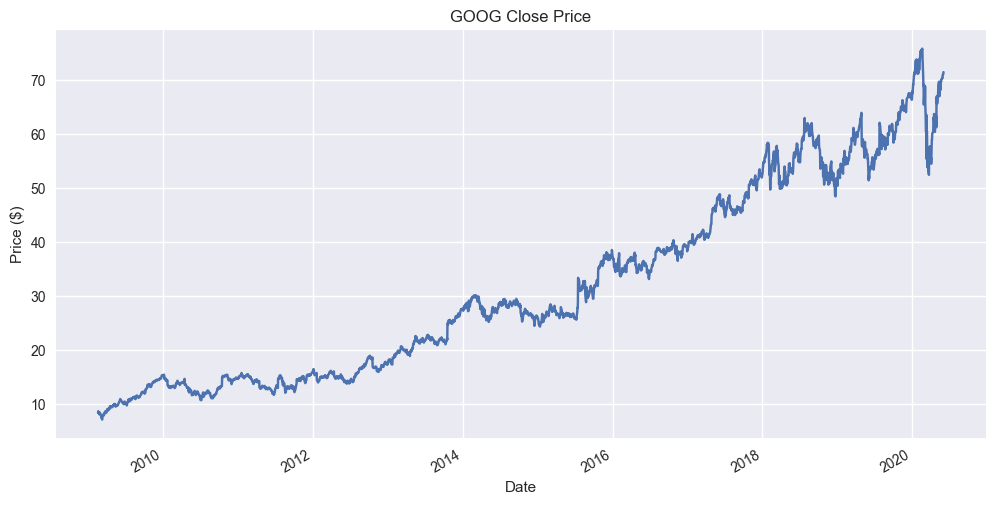

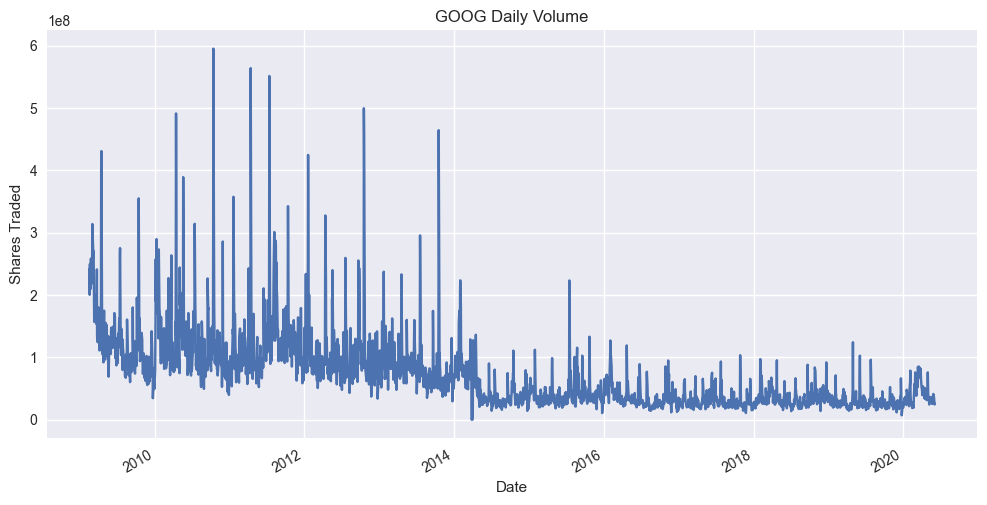

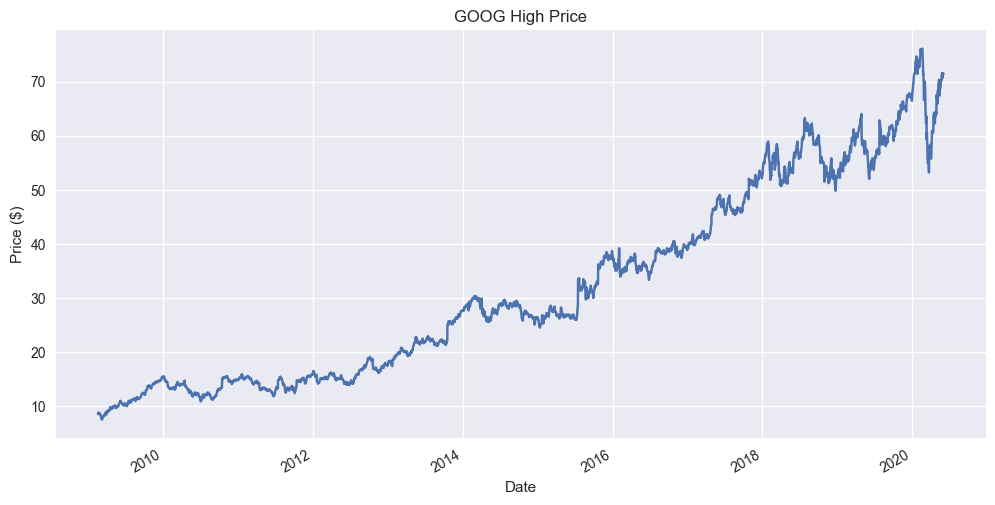

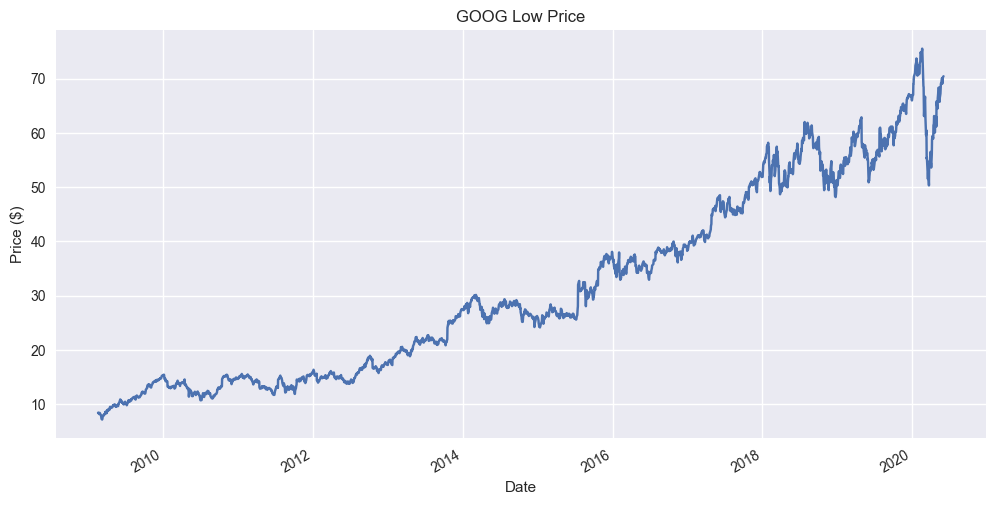

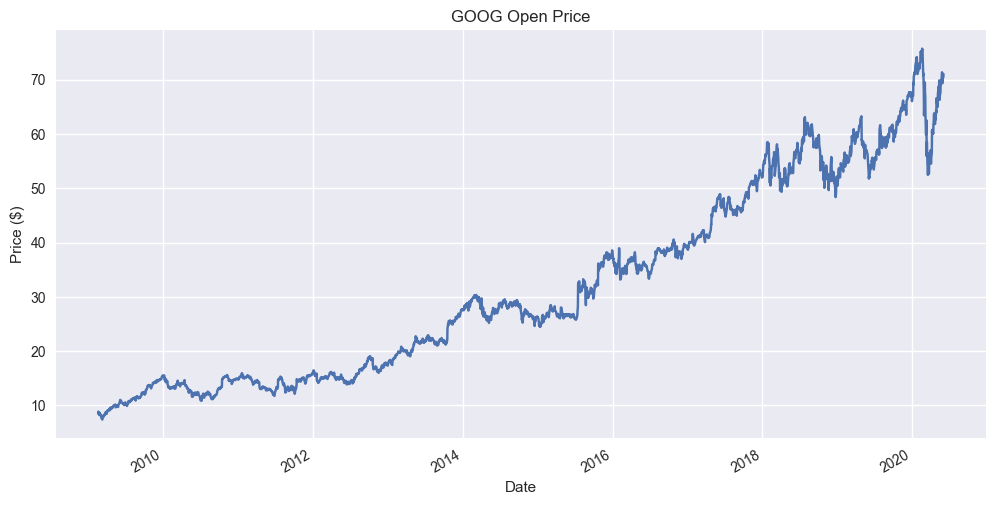

In [55]:

stock.plot_price()

## Stock price over time

## Interpretation of Alphabet (GOOG) Close Price History (2009–2024)
- Overall Trend: The trend is strongly and consistently upward (bullish), moving from around $10 in 2010 to a peak near $75 by early 2020.
- Key Growth Phases:
- 2010-2013: Steady, moderate growth from $\sim\$10$ to $\sim\$20$.
- 2014-2016: Faster growth pushes the price past $\sim\$30$.
- 2017-2020: The price accelerates significantly, showing consistent higher highs, climbing past $\sim\$60$ and peaking near $\sim\$75$.
- Volatility: The GOOG price path is generally smoother than both AAPL and AMZN, showing fewer large, sharp drops or swings until the very end of the charted period. It exhibits strong, gradual appreciation.

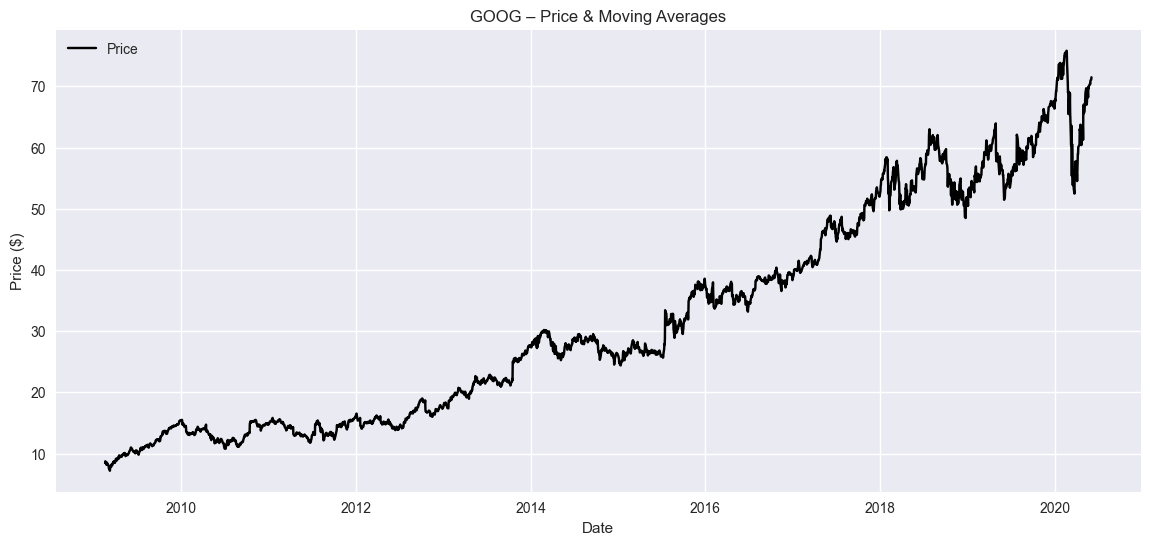

In [56]:
stock.plot_price_sma()


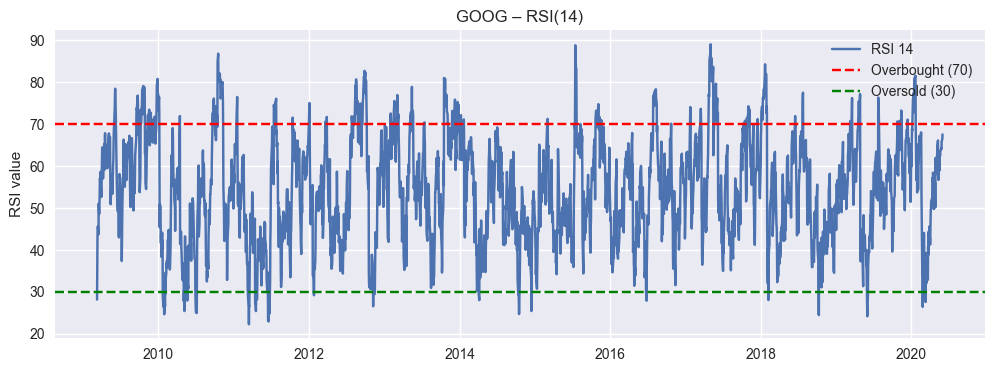

In [57]:



stock.plot_rsi()



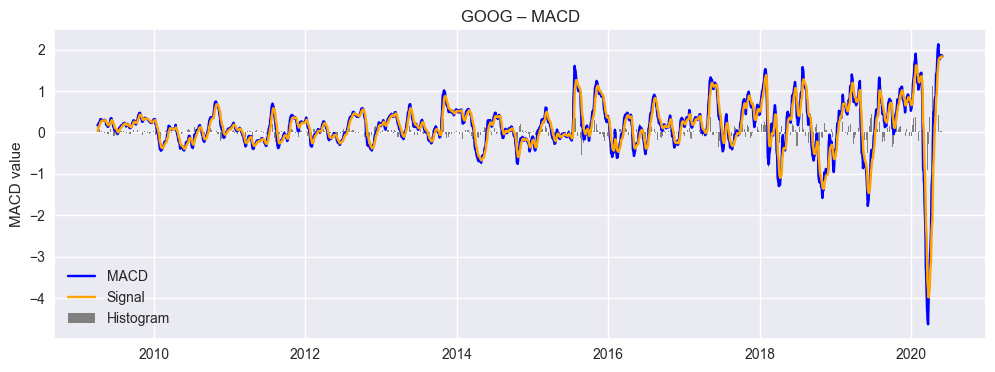

In [58]:
stock.plot_macd()


## Interpretation of Alphabet (GOOG) Price and Moving Averages (2009–2024)
- Exceptional Uptrend: The stock shows a very strong, consistently upward (bullish) trend, starting around $10 and ending near $75. This represents significant long-term capital appreciation.

- Low Volatility: Compared to AAPL and AMZN, GOOG's growth path is the smoothest among the "Big Three." It features fewer sharp, deep drops and no major, prolonged periods of consolidation like AAPL had.

- Implied Technical Strength: Since the trend is so smooth and strong, the price was almost certainly consistently above its key Moving Averages. This indicates sustained, healthy investor confidence and low selling pressure throughout the decade.

## Interpretation of Alphabet (GOOG) Relative Strength Index (RSI 14)
- The RSI (momentum oscillator) confirms the low-volatility strength of the trend.

- Consistent Momentum: The RSI line spends the vast majority of its time above the 50 centerline, validating the bullish momentum.

- Few Oversold Signals: The RSI rarely dips below the 30 (Oversold) line. This scarcity of "oversold" signals underscores the low selling pressure and strong underlying demand for GOOG shares throughout the period.

- Rally Confirmation: The RSI frequently pushes into the 70+ (Overbought) zone, signaling rapid price rallies, but it usually pulls back from this zone in a controlled manner, reinforcing the smooth nature of the stock's appreciation.


## Interpretation of Alphabet (GOOG) MACD
- Sustained Bullish Trend: The MACD line spends the vast majority of its time above the zero line. This is the strongest technical confirmation of the stable, powerful, long-term uptrend observed in the GOOG price chart.

- Low Volatility Momentum: Compared to the MACD charts for AAPL and AMZN, the GOOG MACD exhibits smaller and tighter oscillations around the zero line for most of the decade (2010–2018). This confirms that the stock's momentum was less volatile and more consistent.

- Clear Crossovers: The moments when the Blue MACD Line crosses the Orange Signal Line (crossovers) define key turning points in short-term momentum. Bullish crossovers near the zero line generally confirm the start of new, strong rallies.

- Late Period Volatility: The size of the MACD swings dramatically increases toward the end of the chart (2018–2020). This confirms that the stock's underlying momentum became much more volatile, with the final large negative spike around early 2020 showing a sharp surge in selling pressure.

In [59]:
df.head()


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2009-02-17,8.476503,8.586090,8.403033,8.571742,228067661,GOOG
2009-02-18,8.735009,8.741689,8.423566,8.589802,241883252,GOOG
2009-02-19,8.476008,8.900501,8.445582,8.842864,200295955,GOOG
2009-02-20,8.570259,8.631360,8.287016,8.362465,249616129,GOOG
2009-02-23,8.164813,8.653129,8.152196,8.583863,209626799,GOOG


In [60]:

def safe_parse_with_utc(date_val):
    try:
        dt = parser.parse(str(date_val), dayfirst=False)  # adjust dayfirst if your dataset is DD-MM-YYYY
        return pd.Timestamp(dt, tz='UTC')
    except:
        return pd.NaT

if 'date' in df.columns:
    df['date'] = df['date'].astype(str).str.strip()
    df['date'] = df['date'].apply(safe_parse_with_utc)
    
    if df['date'].isnull().any():
        print("Warning: Some dates could not be parsed and are set as NaT.")
    
    df = df.sort_values('date').reset_index(drop=True)
    
    print(df['date'].head())
    print(f"Data type: {df['date'].dtype}")


In [61]:
print(sentiment_df.columns.tolist())


['headline', 'url', 'publisher', 'date', 'stock', 'headline_length', 'TextBlob_Sentiment', 'TextBlob_Category']


In [62]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.strftime('%Y-%m-%d')


In [63]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])


In [64]:
sentiment_df[sentiment_df['stock'] == 'GOOG']


,headline,url,publisher,date,stock,headline_length,TextBlob_Sentiment,TextBlob_Category
1112676,Startup Point Of Sale Operating System Poynt R...,https://www.benzinga.com/fintech/18/11/1268071...,Spencer White,2018-11-13,GOOG,57,0.000000,Neutral
1112682,"Day After Selloff, Earnings, Trade News Seem T...",https://www.benzinga.com/news/earnings/18/11/1...,JJ Kinahan,2018-11-13,GOOG,58,0.000000,Neutral
1113409,"Moderate Inflation, Positive Retail Earnings O...",https://www.benzinga.com/news/earnings/18/11/1...,JJ Kinahan,2018-11-14,GOOG,80,0.113636,Positive
1113410,UPDATE: JANA Partners 13F Shows Fund Liquidate...,https://www.benzinga.com/news/18/11/12696718/u...,Benzinga Newsdesk,2018-11-14,GOOG,98,0.000000,Neutral
1114418,Loup's Munster On Alphabet/Google Notes Short-...,https://www.benzinga.com/analyst-ratings/analy...,Benzinga Newsdesk,2018-11-15,GOOG,209,0.436111,Positive
...,...,...,...,...,...,...,...,...
1350738,Trump Signs Executive Order To End Social Medi...,https://www.benzinga.com/government/20/05/1613...,Neer Varshney,2020-05-29,GOOG,86,0.116667,Positive
1351067,UK Supply Chain Startup Beacon Raises $15M Fro...,https://www.benzinga.com/news/20/06/16146470/u...,Neer Varshney,2020-06-01,GOOG,66,0.000000,Neutral
1351068,The 'Real' S&P 500 And Why The Current Rally M...,https://www.benzinga.com/opinion/20/06/1614773...,Eric Mancini,2020-06-01,GOOG,56,0.100000,Positive
1351069,The First Week of June Is All About the May's ...,https://www.benzinga.com/news/earnings/20/06/1...,IAM Newswire,2020-06-01,GOOG,57,0.250000,Positive



Pearson Correlation:
                     return  daily_sentiment  lagged_sentiment
return            1.000000         0.086177         -0.005033
daily_sentiment   0.086177         1.000000         -0.015931
lagged_sentiment -0.005033        -0.015931          1.000000

Spearman Correlation:
                     return  daily_sentiment  lagged_sentiment
return            1.000000         0.014773         -0.022314
daily_sentiment   0.014773         1.000000         -0.001211
lagged_sentiment -0.022314        -0.001211          1.000000

Kendall Correlation:
                     return  daily_sentiment  lagged_sentiment
return            1.000000         0.012784         -0.015885
daily_sentiment   0.012784         1.000000         -0.000232
lagged_sentiment -0.015885        -0.000232          1.000000


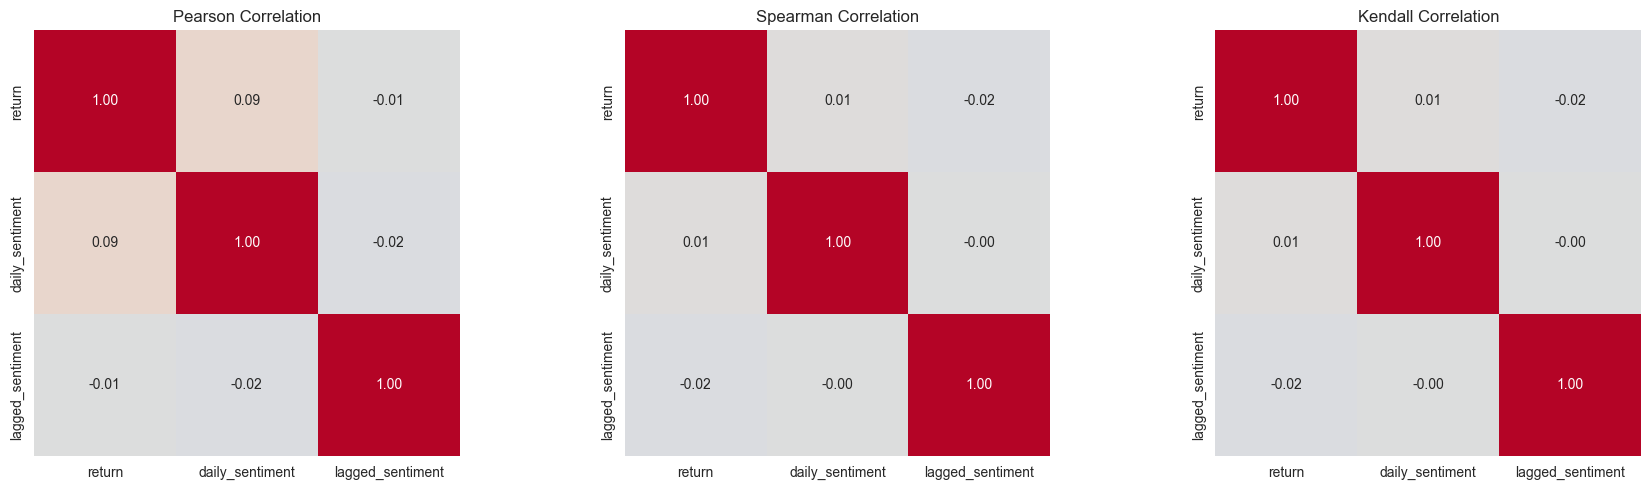

In [65]:


# -------------------------------
# 1. FILTER NEWS FOR GOOG ONLY
# -------------------------------
sentiment_df = sentiment_df[sentiment_df['stock'] == "GOOG"].copy()
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# -------------------------------
# 2. PREPARE STOCK DATA
# -------------------------------
# Ensure stock dataframe index is datetime
df.index = pd.to_datetime(df.index)

# -------------------------------
# 3. ALIGN NEWS DATES TO NEXT TRADING DAY
# -------------------------------
stock_dates = df.index

def align_to_next_trading_day(news_date):
    future_dates = stock_dates[stock_dates >= news_date]
    if len(future_dates) == 0:
        return None
    return future_dates[0]

sentiment_df['aligned_date'] = sentiment_df['date'].apply(align_to_next_trading_day)
sentiment_df = sentiment_df.dropna(subset=['aligned_date'])

# -------------------------------
# 4. AGGREGATE DAILY SENTIMENT
# -------------------------------
daily_sentiment = (
    sentiment_df.groupby('aligned_date')['TextBlob_Sentiment']
    .mean()
    .to_frame('daily_sentiment')
)

# Create lagged sentiment (previous day's sentiment)
daily_sentiment['lagged_sentiment'] = daily_sentiment['daily_sentiment'].shift(1)

# -------------------------------
# 5. CALCULATE DAILY STOCK RETURNS
# -------------------------------
df['return'] = df['Close'].pct_change()

# -------------------------------
# 6. MERGE STOCK + SENTIMENT
# -------------------------------
merged_df = df.merge(
    daily_sentiment,
    left_index=True,
    right_index=True,
    how='left'
)

# -------------------------------
# 7. CORRELATION ANALYSIS
# -------------------------------
# Drop NaNs for correlation calculation
df_corr = merged_df[['return', 'daily_sentiment', 'lagged_sentiment']].dropna()

corr_methods = {
    "Pearson": df_corr.corr(method="pearson"),
    "Spearman": df_corr.corr(method="spearman"),
    "Kendall": df_corr.corr(method="kendall"),
}

# Print correlations
for name, corr in corr_methods.items():
    print(f"\n{name} Correlation:\n", corr)

# -------------------------------
# 8. VISUALIZATION
# -------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (title, corr) in zip(axes, corr_methods.items()):
    sns.heatmap(
        corr,
        ax=ax,
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        annot=True,
        fmt=".2f",
        square=True,
        cbar=False
    )
    ax.set_title(f"{title} Correlation")

fig.tight_layout()
plt.show()


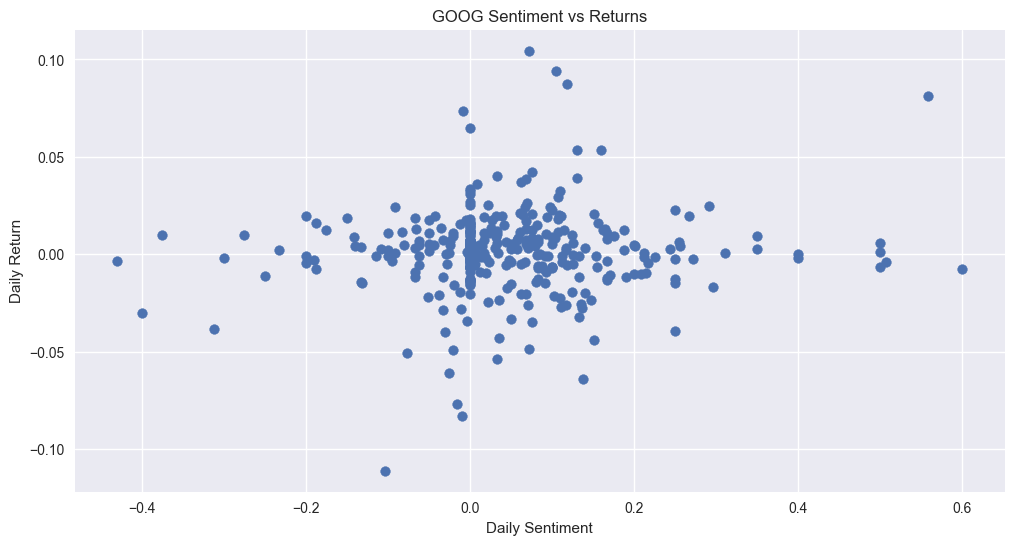

In [66]:


plt.scatter(merged_df['daily_sentiment'], merged_df['return'])
plt.xlabel("Daily Sentiment")
plt.ylabel("Daily Return")
plt.title("GOOG Sentiment vs Returns")
plt.show()


 ## Return vs. Sentiment Relationships
 - Across all three correlation methods, the relationship between returns and both daily and lagged sentiment is practically non-existent.
 - return vs. daily_sentiment (Pearson: 0.09): This is a negligible positive correlation. It suggests that a slight positive return coincides with a very slightly positive sentiment, but the magnitude is too small to be meaningful for prediction.
 - return vs. lagged_sentiment (Pearson: -0.01): This correlation is zero. There is no linear relationship between yesterday's sentiment and today's stock return.
 
 2. 📰 Sentiment PersistenceThe correlation between daily_sentiment and lagged_sentiment is also essentially zero.
 
 - daily_sentiment vs. lagged_sentiment (Pearson: -0.02): A value this close to zero indicates that sentiment is not persistent and not volatile in an alternating way. The sentiment expressed on one day is entirely independent of the sentiment expressed the day before.
 
 3. Consistency Across MethodsThe weak nature of the relationships is consistent across all three methods:Pearson (Linear): Shows minimal linear relationships.Spearman & Kendall (Monotonic): Also show minimal monotonic relationships (coefficients are all $\pm 0.02$ or $0.01$).

## Interpretation of the GOOG Scatter Plot

- The most significant feature of this plot is the severe lack of any organized pattern, confirming that sentiment offers virtually no predictive value for GOOG returns.

1. Zero Correlation Visually ConfirmedThe data points form a dense, random cloud centered near the origin (0.0, 0.0) . There is no discernible slope—the points are spread equally in all directions.
- This lack of structure definitively confirms the near-zero correlation observed in the numerical matrices ($\approx 0.01$).

- It means that whether the sentiment is highly negative (e.g., $-0.40$) or highly positive (e.g., $+0.60$), the daily return is equally likely to be negative, neutral, or positive.

2. Centralized Movement
- Most data points are concentrated close to the (0, 0) intersection:
- Sentiment: Most scores fall between approximately $-0.10$ and $+0.20$.
- Returns: Most daily returns are very small, confined between approximately $-0.02$ and $+0.02$.
3. Extreme Outliers
-The plot contains several notable outliers, which further emphasize the independence of the two variables:
- There are news days with extremely high positive sentiment (around $+0.60$) that are associated with a near-zero daily return.
- Conversely, there are days with extremely negative sentiment (around $-0.40$) that are also associated with a near-zero daily return.